# TensorFlow Regression Example

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [5]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [6]:
my_data.head()

,X Data,Y
0,0.00000,4.825703
1,0.00001,3.881852
2,0.00002,5.298043
3,0.00003,3.741840
4,0.00004,4.300040


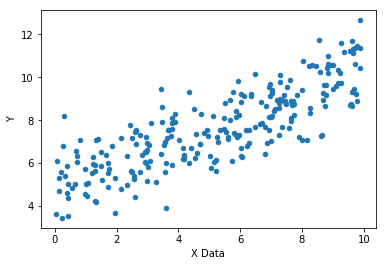

In [7]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [8]:
import tensorflow as tf

In [9]:
# Random 10 points to grab
batch_size = 8

** Variables **

In [10]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

Instructions for updating:
Colocations handled automatically by placer.


** Placeholders **

In [12]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [13]:
y_model = m*xph + b

** Loss Function **

In [14]:
error = tf.reduce_sum(tf.square(yph-y_model)) #驗證

** Optimizer **

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [16]:
init = tf.global_variables_initializer()

### Session

In [17]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [18]:
model_m

0.46686402

In [19]:
model_b

4.9298973

### Results

In [20]:
y_hat = x_data * model_m + model_b

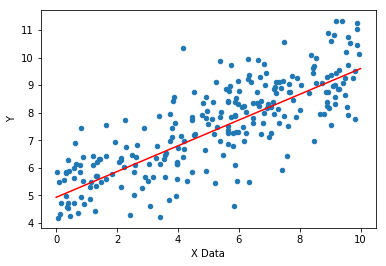

In [21]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Batch size
batch_size = 25

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 建立給線性迴歸的變數
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 模型建立
model_output = tf.add(tf.matmul(x_data, A), b) #將x_data跟A做內積，再加上b

# 成本函數定義，計算總Loss
loss = tf.reduce_mean(tf.square(y_target - model_output)) #MSE

# 優化器
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

# 初始化參數
init = tf.global_variables_initializer()
sess.run(init)

In [5]:
# 訓練階段
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size) #四個欄位資料
    rand_x = np.transpose([x_vals[rand_index]]) #轉置X
    rand_y = np.transpose([y_vals[rand_index]]) #轉置Y
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))


Step #25 A = [[2.6159222]] b = [[2.1874108]]
Loss = 2.3233194
Step #50 A = [[1.9986956]] b = [[3.216031]]
Loss = 0.80041623
Step #75 A = [[1.5153023]] b = [[3.834536]]
Loss = 0.7206629
Step #100 A = [[1.2662579]] b = [[4.190666]]
Loss = 0.41453117


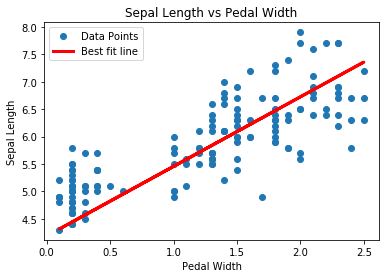

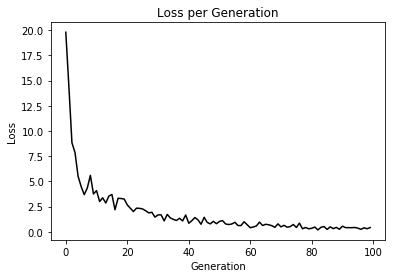

In [7]:
# 取得結果
[slope] = sess.run(A) #取得斜率
[y_intercept] = sess.run(b) #取得截距

# 計算fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss 
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()